<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2024/blob/main/ELM/Predciation_of_O3_based_ELM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# Install hpelm if not already installed
# !pip install hpelm

In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from hpelm import ELM

# Load dataset
data = pd.read_csv("air_quality_o3.csv")

# Features and target
features = ["AMP_TMP","CO","NO","NO2","Nox","RH","SO2","WD","WS","PM10"]
target = "O3"

X = data[features].values
y = data[target].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to compute VAF
def vaf(y_true, y_pred):
    return 1 - np.var(y_true - y_pred)/np.var(y_true)

# Grid search over hidden neurons
best_neurons = None
best_vaf = -np.inf
best_model = None

for n_hidden in range(300, 500):  # Try various no of nurons
    elm = ELM(X_train.shape[1], 1)
    elm.add_neurons(n_hidden, "tanh")

    # Train with regularization (alpha=0.1 helps stability)
    elm.train(X_train, y_train.reshape(-1,1), "Ridge", alpha=0.1)

    y_val_pred = elm.predict(X_train).flatten()
    current_vaf = vaf(y_train, y_val_pred)

    if current_vaf > best_vaf:
        best_vaf = current_vaf
        best_neurons = n_hidden
        best_model = elm

print(f"Best hidden neurons: {best_neurons}, Train VAF: {best_vaf:.4f}")

# Predict on train and test
y_train_pred = best_model.predict(X_train).flatten()
y_test_pred = best_model.predict(X_test).flatten()

# Compute metrics
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

metrics = {
    "Dataset": ["Train", "Test"],
    "MSE": [mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)],
    "RMSE": [RMSE_train, RMSE_test],
    "VAF": [vaf(y_train, y_train_pred), vaf(y_test, y_test_pred)],
    "R2": [r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)]
}

metrics_df = pd.DataFrame(metrics)

Best hidden neurons: 496, Train VAF: 0.9119


In [105]:
print("\nPerformance Metrics:")
metrics_df


Performance Metrics:


,Dataset,MSE,RMSE,VAF,R2
0,Train,9.390807,3.064442,0.911866,0.911865
1,Test,54.877357,7.407925,0.537317,0.534850


In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from hpelm import ELM
import matplotlib.pyplot as plt

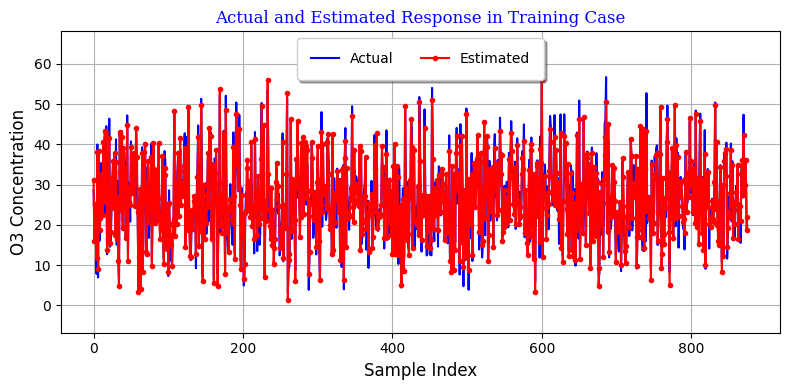

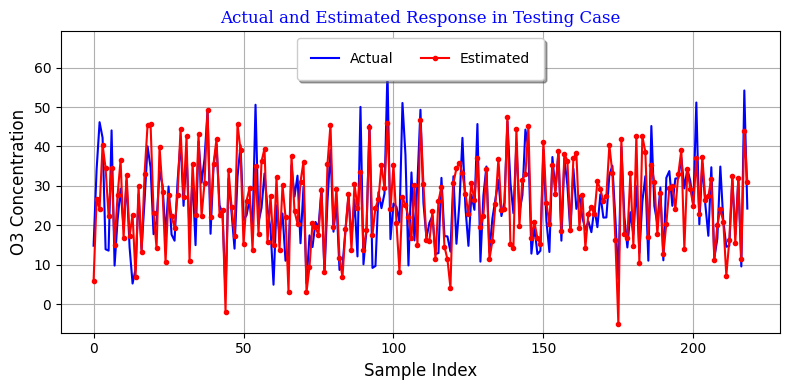

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Plot actual vs estimated responses
# -----------------------------

# Training set
fig, axs = plt.subplots(figsize=(8,4), tight_layout=True)

plt.plot(y_train, '-b', label='Actual')
plt.plot(y_train_pred, '.-r', label='Estimated')

plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('O3 Concentration', fontsize=12)

plt.title('Actual and Estimated Response in Training Case', fontname='serif', fontsize=12, color='b')
plt.ylim(np.min(y_train)-10, np.max(y_train)+10)  # adjust margin if needed
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='upper center', ncol=2)
plt.grid(True)
plt.show()

# Testing set
fig, axs = plt.subplots(figsize=(8,4), tight_layout=True)

plt.plot(y_test, '-b', label='Actual')
plt.plot(y_test_pred, '.-r', label='Estimated')

plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('O3 Concentration', fontsize=12)

plt.title('Actual and Estimated Response in Testing Case', fontname='serif', fontsize=12, color='b')
plt.ylim(np.min(y_test)-10, np.max(y_test)+10)  # adjust margin if needed
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='upper center', ncol=2)
plt.grid(True)

# Save figure (optional)
plt.savefig('Actual_Estimated_ELM.png')
plt.show()


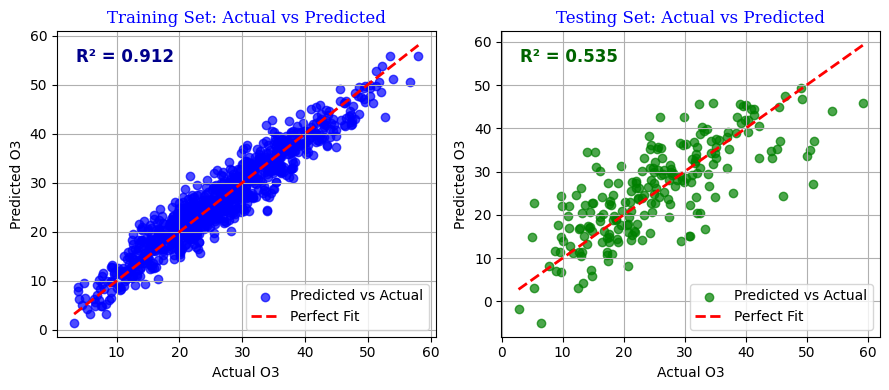

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Calculate R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(9,4), tight_layout=True)

# Training set
axs[0].scatter(y_train, y_train_pred, color='blue', alpha=0.7, label='Predicted vs Actual')
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect Fit')
axs[0].set_title('Training Set: Actual vs Predicted', fontsize=12, fontname='serif', color='b')
axs[0].set_xlabel('Actual O3')
axs[0].set_ylabel('Predicted O3')
axs[0].text(0.05, 0.9, f"R² = {r2_train:.3f}", transform=axs[0].transAxes, fontsize=12, fontweight='bold', color='darkblue')
axs[0].legend()
axs[0].grid(True)

# Testing set
axs[1].scatter(y_test, y_test_pred, color='green', alpha=0.7, label='Predicted vs Actual')
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
axs[1].set_title('Testing Set: Actual vs Predicted', fontsize=12, fontname='serif', color='b')
axs[1].set_xlabel('Actual O3')
axs[1].set_ylabel('Predicted O3')
axs[1].text(0.05, 0.9, f"R² = {r2_test:.3f}", transform=axs[1].transAxes, fontsize=12, fontweight='bold', color='darkgreen')
axs[1].legend()
axs[1].grid(True)

plt.savefig('Correlation_ELM.png')
plt.show()


In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("air_quality_o3.csv")

# Features and target
features = ["AMP_TMP","CO","NO","NO2","Nox","RH","SO2","WD","WS","PM10"]
target = "O3"

X = data[features].values
y = data[target].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Define VAF
def vaf(y_true, y_pred):
    return 1 - np.var(y_true - y_pred)/np.var(y_true)

# Compute metrics
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

metrics = {
    "Dataset": ["Train", "Test"],
    "MSE": [mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)],
    "RMSE": [RMSE_train, RMSE_test],
    "VAF": [vaf(y_train, y_train_pred), vaf(y_test, y_test_pred)],
    "R2": [r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)]
}

metrics_df = pd.DataFrame(metrics)

print("\nPerformance Metrics for Linear Regression:")
metrics_df



Performance Metrics for Linear Regression:


,Dataset,MSE,RMSE,VAF,R2
0,Train,38.261227,6.185566,0.640908,0.640908
1,Test,55.165056,7.427318,0.532416,0.532411


In [110]:
# Print model coefficients
coefficients = pd.DataFrame({"Feature": features, "Coefficient": lr_model.coef_})
print("\nLinear Regression Model Coefficients:")
coefficients


Linear Regression Model Coefficients:


,Feature,Coefficient
0,AMP_TMP,-3.693299
1,CO,-0.123135
2,NO,-2.172135
3,NO2,9.564737
4,Nox,-10.928842
5,RH,-0.092760
6,SO2,-0.083480
7,WD,-2.139310
8,WS,0.406502
9,PM10,1.411097


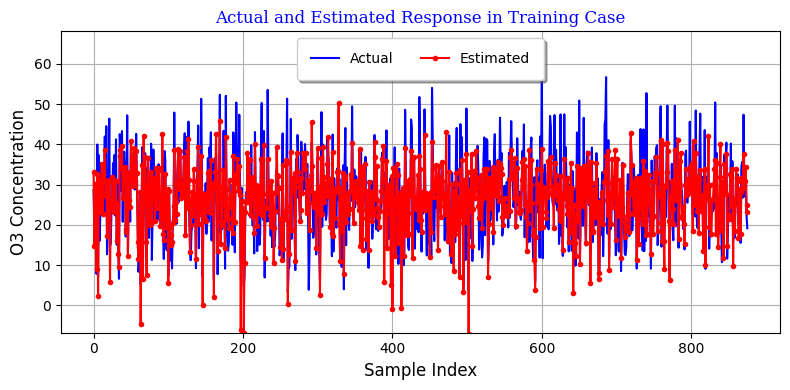

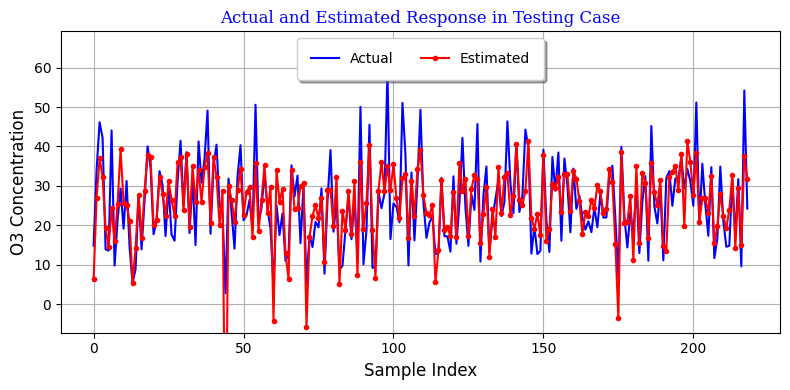

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Plot actual vs estimated responses
# -----------------------------

# Training set
fig, axs = plt.subplots(figsize=(8,4), tight_layout=True)

plt.plot(y_train, '-b', label='Actual')
plt.plot(y_train_pred, '.-r', label='Estimated')

plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('O3 Concentration', fontsize=12)

plt.title('Actual and Estimated Response in Training Case', fontname='serif', fontsize=12, color='b')
plt.ylim(np.min(y_train)-10, np.max(y_train)+10)  # adjust margin if needed
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='upper center', ncol=2)
plt.grid(True)
plt.show()

# Testing set
fig, axs = plt.subplots(figsize=(8,4), tight_layout=True)

plt.plot(y_test, '-b', label='Actual')
plt.plot(y_test_pred, '.-r', label='Estimated')

plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('O3 Concentration', fontsize=12)

plt.title('Actual and Estimated Response in Testing Case', fontname='serif', fontsize=12, color='b')
plt.ylim(np.min(y_test)-10, np.max(y_test)+10)  # adjust margin if needed
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='upper center', ncol=2)
plt.grid(True)

# Save figure (optional)
plt.savefig('Actual_Estimated_LM.png')
plt.show()


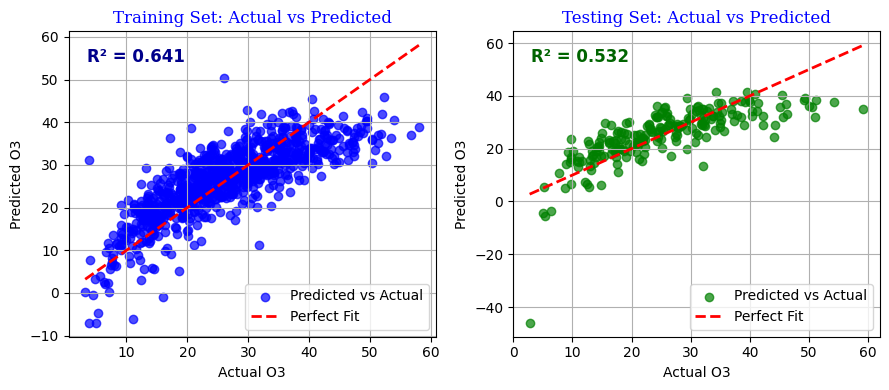

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Calculate R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(9,4), tight_layout=True)

# Training set
axs[0].scatter(y_train, y_train_pred, color='blue', alpha=0.7, label='Predicted vs Actual')
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect Fit')
axs[0].set_title('Training Set: Actual vs Predicted', fontsize=12, fontname='serif', color='b')
axs[0].set_xlabel('Actual O3')
axs[0].set_ylabel('Predicted O3')
axs[0].text(0.05, 0.9, f"R² = {r2_train:.3f}", transform=axs[0].transAxes, fontsize=12, fontweight='bold', color='darkblue')
axs[0].legend()
axs[0].grid(True)

# Testing set
axs[1].scatter(y_test, y_test_pred, color='green', alpha=0.7, label='Predicted vs Actual')
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
axs[1].set_title('Testing Set: Actual vs Predicted', fontsize=12, fontname='serif', color='b')
axs[1].set_xlabel('Actual O3')
axs[1].set_ylabel('Predicted O3')
axs[1].text(0.05, 0.9, f"R² = {r2_test:.3f}", transform=axs[1].transAxes, fontsize=12, fontweight='bold', color='darkgreen')
axs[1].legend()
axs[1].grid(True)

plt.savefig('Correlation_LM.png')
plt.show()


In [119]:
import pandas as pd

# Load dataset
data = pd.read_csv("air_quality_o3.csv")

# Display first few rows
print("First 5 rows of the dataset:")
data.head()


First 5 rows of the dataset:


,AMP_TMP,CO,NO,NO2,Nox,RH,SO2,WD,WS,PM10,O3
0,12.67,0.31,1.32,8.38,9.70,57.45,4.66,272.78,3.02,57.83,33.69
1,14.39,0.26,2.50,8.89,11.39,55.86,1.93,276.06,2.15,36.13,28.49
2,16.44,0.41,3.34,11.64,14.99,66.62,2.36,237.07,1.34,33.08,24.25
3,17.46,0.31,4.35,12.36,16.72,78.75,1.38,198.88,1.23,28.50,19.54
4,17.68,0.35,5.22,15.37,20.59,90.20,2.57,210.56,1.61,16.67,20.24


In [120]:
data.describe()

,AMP_TMP,CO,NO,NO2,Nox,RH,SO2,WD,WS,PM10,O3
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,22.828889,0.387773,4.538562,11.245281,15.786744,80.052298,2.623121,190.417708,1.701910,37.979963,26.297766
std,5.265200,0.125974,2.678366,3.526464,5.244952,8.446745,1.583075,44.479594,0.675993,21.226532,10.448088
min,9.225000,0.037500,0.278750,0.824167,1.103333,46.290000,0.262500,52.460000,0.779583,3.833333,2.762500
25%,18.771458,0.300000,2.662708,8.713333,12.020417,74.204167,1.802083,159.243750,1.310000,25.311667,18.920417
50%,23.010417,0.370000,3.925833,10.897500,15.340000,80.305417,2.312500,185.715833,1.562500,34.833333,25.550000
75%,27.685000,0.466875,5.904167,13.685625,19.098333,86.270000,3.041667,220.422917,1.904167,46.479167,33.291667
max,32.250000,0.940000,29.379583,27.203333,43.938333,97.083333,22.750000,302.298333,8.609583,377.500000,59.208333
